In [215]:
import numpy as np

In [216]:
from scipy.io import arff
import pandas as pd

In [217]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [218]:
data = arff.loadarff('Autism-Adolescent-Data.arff')
df = pd.DataFrame(data[0])

In [219]:
df

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,b'0',b'0',b'0',b'1',b'1',b'1',b'1',b'1',b'1',b'0',...,b'm',b'Hispanic',b'yes',b'yes',b'Austria',b'no',6.0,"b""'12-16 years'""",b'Parent',b'NO'
1,b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'1',b'1',...,b'm',b'Black',b'no',b'no',b'Austria',b'no',2.0,"b""'12-16 years'""",b'Relative',b'NO'
2,b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'1',b'1',...,b'f',b'?',b'no',b'no',b'AmericanSamoa',b'no',2.0,"b""'12-16 years'""",b'?',b'NO'
3,b'0',b'1',b'1',b'1',b'1',b'1',b'0',b'1',b'1',b'0',...,b'f',b'White-European',b'no',b'no',"b""'United Kingdom'""",b'no',7.0,"b""'12-16 years'""",b'Self',b'YES'
4,b'1',b'1',b'1',b'1',b'1',b'1',b'1',b'0',b'0',b'0',...,b'f',b'?',b'no',b'no',b'Albania',b'no',7.0,"b""'12-16 years'""",b'?',b'YES'
5,b'1',b'0',b'0',b'0',b'0',b'1',b'0',b'0',b'1',b'0',...,b'f',b'?',b'no',b'no',b'Belgium',b'no',3.0,"b""'12-16 years'""",b'?',b'NO'
6,b'0',b'0',b'0',b'1',b'1',b'1',b'1',b'1',b'1',b'0',...,b'f',b'?',b'no',b'no',b'Afghanistan',b'no',6.0,"b""'12-16 years'""",b'?',b'NO'
7,b'1',b'1',b'0',b'1',b'1',b'0',b'1',b'1',b'0',b'1',...,b'f',"b""'Middle Eastern '""",b'no',b'no',b'Australia',b'no',7.0,"b""'12-16 years'""",b'Parent',b'YES'
8,b'1',b'1',b'1',b'1',b'1',b'1',b'0',b'0',b'0',b'0',...,b'm',b'Black',b'yes',b'yes',b'Bahrain',b'no',6.0,"b""'12-16 years'""",b'Parent',b'NO'
9,b'0',b'1',b'1',b'0',b'0',b'1',b'0',b'0',b'1',b'0',...,b'f',"b""'South Asian'""",b'no',b'no',b'Azerbaijan',b'no',4.0,"b""'12-16 years'""",b'Parent',b'NO'


In [220]:
df = df.replace(b'0',0)
df = df.replace(b'1',1)
df = df.replace(b'm',1)
df = df.replace(b'f',0)
df = df.replace(b'yes',1)
df = df.replace(b'no',0)
df = df.replace(b'YES',1)
df = df.replace(b'NO',0)
df = df.replace(b"'12-16 years'",0)
df = df.replace(b"'12-15 years'",0)
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,0,0,0,1,1,1,1,1,1,0,...,1,b'Hispanic',1,1,b'Austria',0,6.0,0,b'Parent',0
1,0,0,0,0,0,0,0,0,1,1,...,1,b'Black',0,0,b'Austria',0,2.0,0,b'Relative',0
2,0,0,0,0,0,0,0,0,1,1,...,0,b'?',0,0,b'AmericanSamoa',0,2.0,0,b'?',0
3,0,1,1,1,1,1,0,1,1,0,...,0,b'White-European',0,0,"b""'United Kingdom'""",0,7.0,0,b'Self',1
4,1,1,1,1,1,1,1,0,0,0,...,0,b'?',0,0,b'Albania',0,7.0,0,b'?',1


In [221]:
s = df.drop('ethnicity',axis=1)

In [222]:
p = s.drop('contry_of_res',axis=1)
dft = p.drop('relation',axis=1)
dft.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,jundice,austim,used_app_before,result,age_desc,Class/ASD
0,0,0,0,1,1,1,1,1,1,0,15.0,1,1,1,0,6.0,0,0
1,0,0,0,0,0,0,0,0,1,1,15.0,1,0,0,0,2.0,0,0
2,0,0,0,0,0,0,0,0,1,1,12.0,0,0,0,0,2.0,0,0
3,0,1,1,1,1,1,0,1,1,0,14.0,0,0,0,0,7.0,0,1
4,1,1,1,1,1,1,1,0,0,0,16.0,0,0,0,0,7.0,0,1


/home/karan/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/karan/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


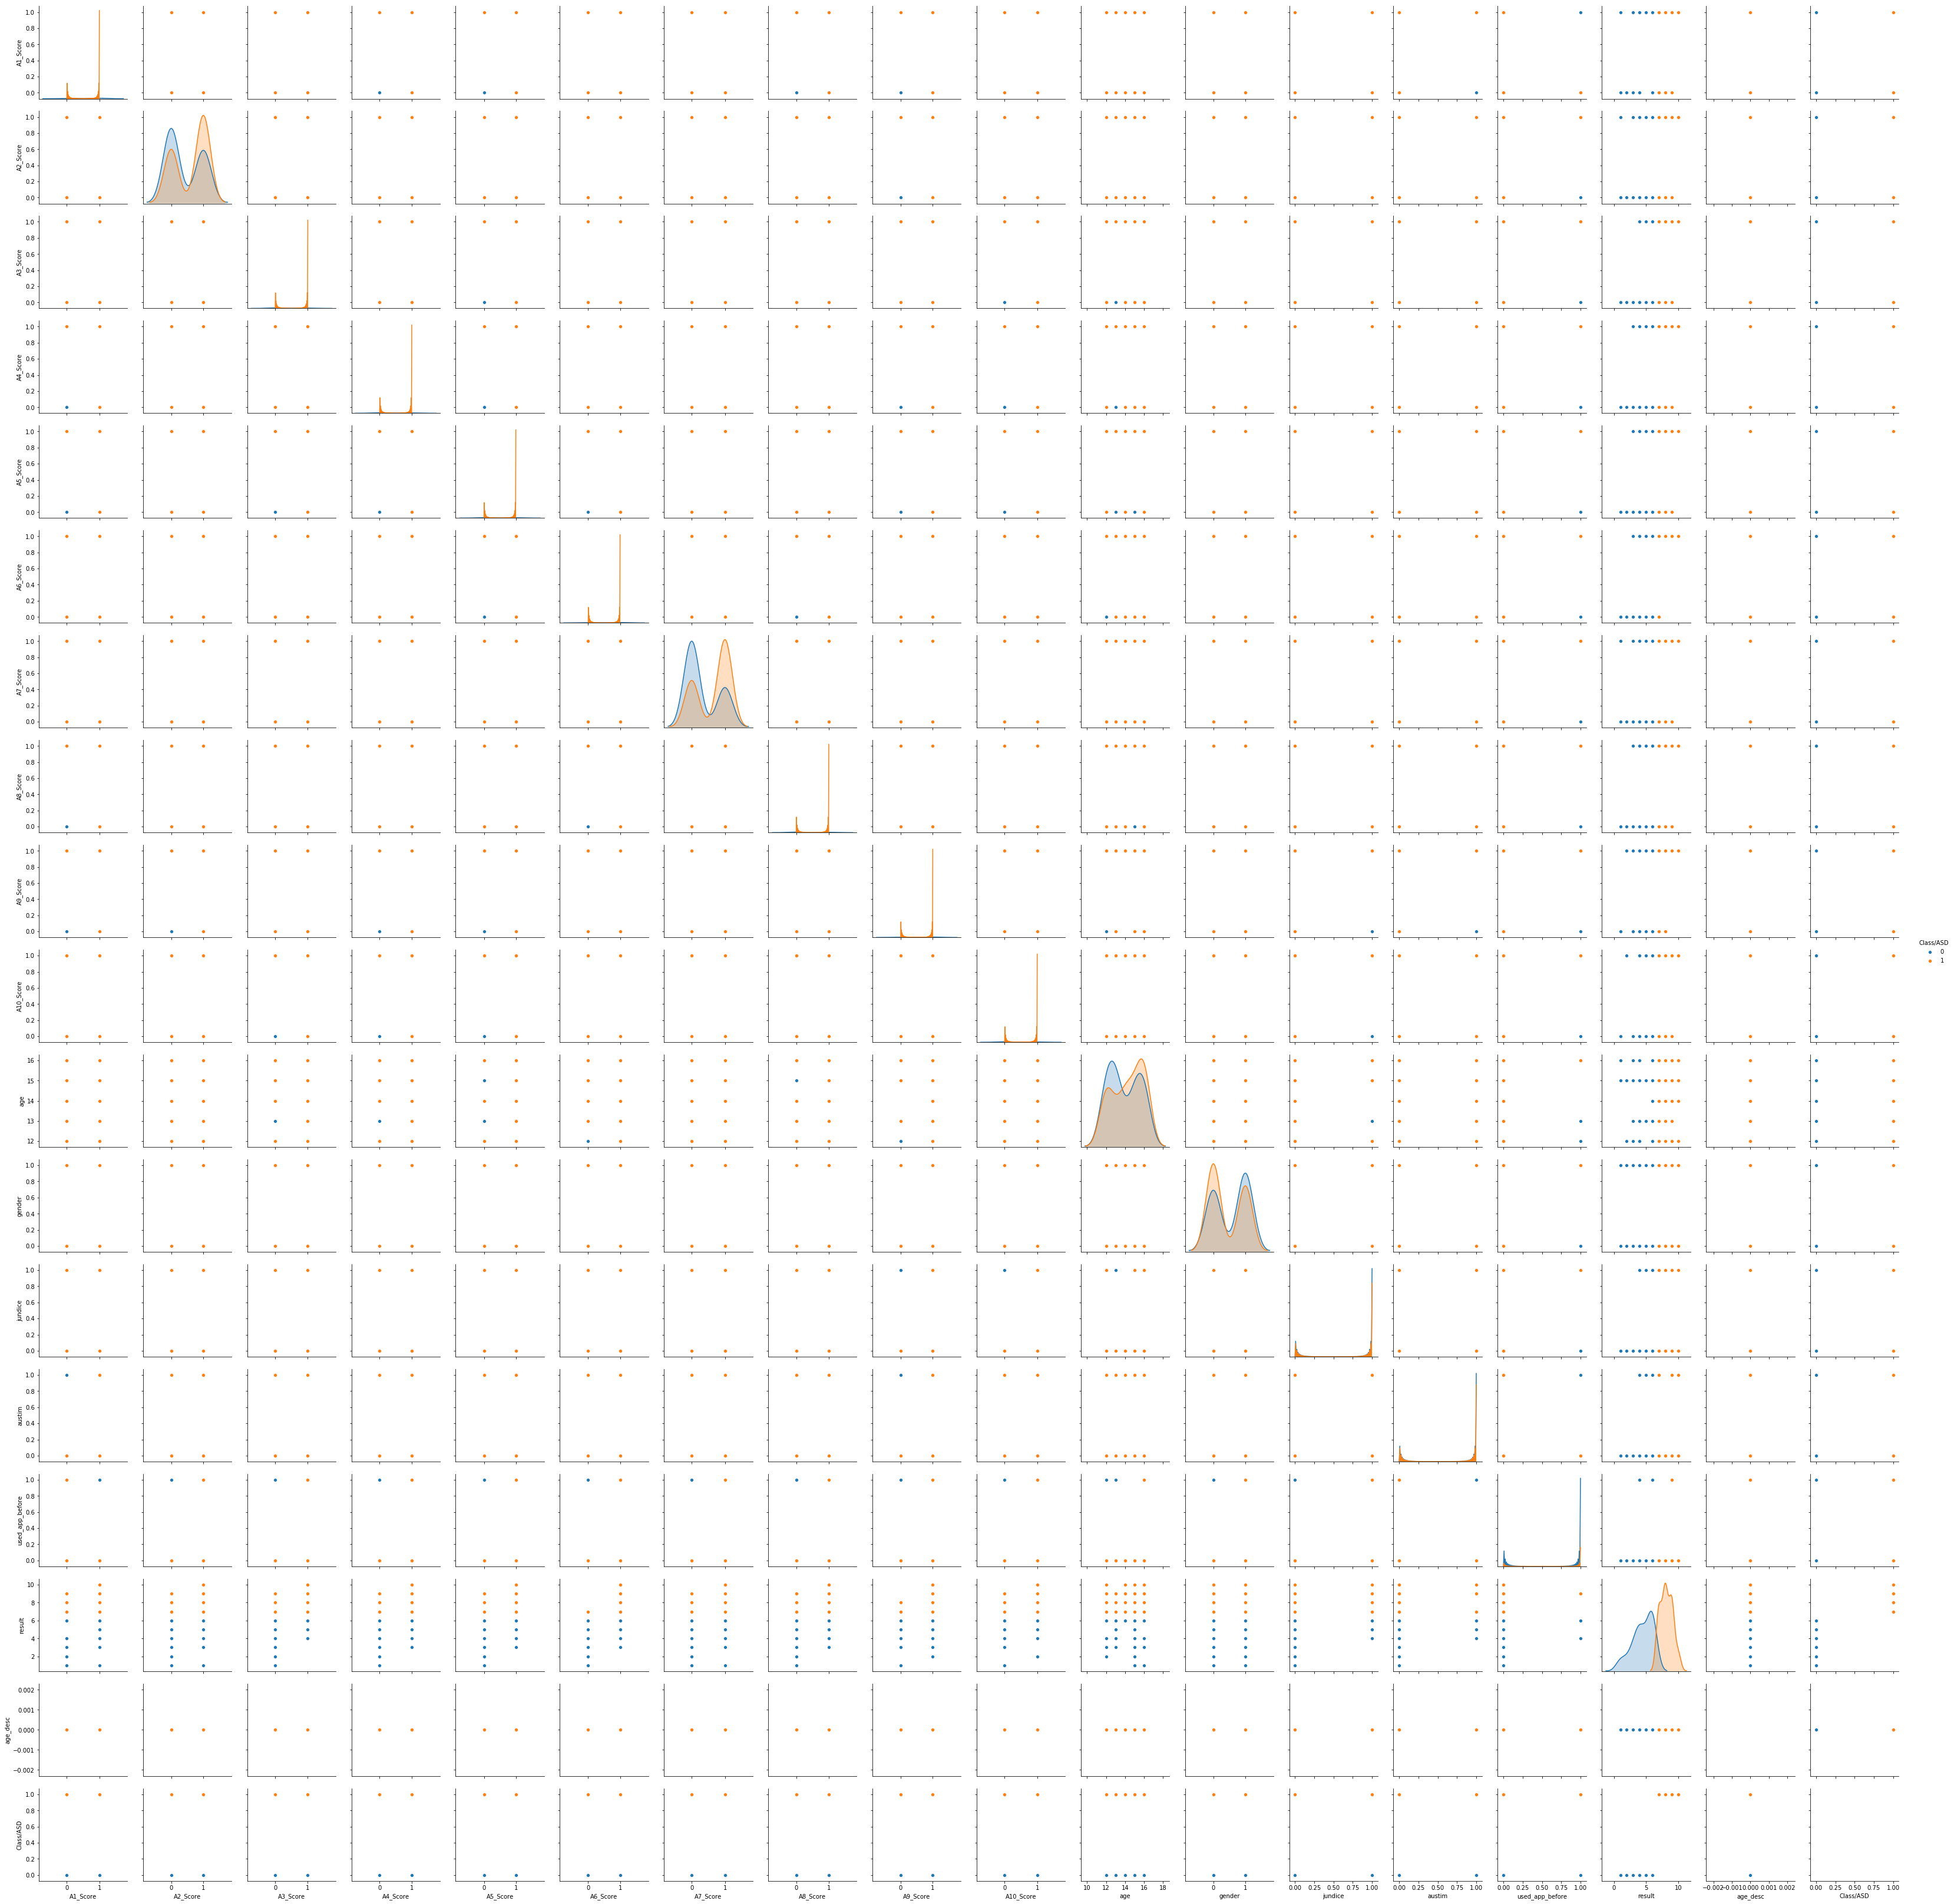

In [223]:
sns.pairplot(dft,hue='Class/ASD')

In [224]:
from sklearn.model_selection import train_test_split

In [225]:
X = dft.drop('Class/ASD',axis=1)

In [226]:
y = dft['Class/ASD']

In [227]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [228]:
from sklearn.tree import DecisionTreeClassifier

In [229]:
dtree  = DecisionTreeClassifier()

In [230]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [231]:
predictions = dtree.predict(X_test)

In [232]:
from sklearn.metrics import classification_report,confusion_matrix

In [233]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[23  0]
 [ 0 19]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        19

   micro avg       1.00      1.00      1.00        42
   macro avg       1.00      1.00      1.00        42
weighted avg       1.00      1.00      1.00        42



In [234]:
from sklearn.ensemble import RandomForestClassifier

In [235]:
rfc = RandomForestClassifier(n_estimators=200)

In [236]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [237]:
rfc_pred = rfc.predict(X_test)

In [238]:
print(confusion_matrix(y_test,rfc_pred))
print(classification_report(y_test,rfc_pred))

[[23  0]
 [ 0 19]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        19

   micro avg       1.00      1.00      1.00        42
   macro avg       1.00      1.00      1.00        42
weighted avg       1.00      1.00      1.00        42



In [239]:
pd.crosstab(y_test,rfc_pred, rownames=['Actual Result'], colnames=['Predicted Result'])

Predicted Result,0,1
Actual Result,,
0,23,0
1,0,19


In [241]:
list(zip(X_train, rfc.feature_importances_))

[('A1_Score', 0.012151518070264123),
 ('A2_Score', 0.009043131848731073),
 ('A3_Score', 0.07562021929186541),
 ('A4_Score', 0.05144641281692412),
 ('A5_Score', 0.07834564744521466),
 ('A6_Score', 0.1038481711152106),
 ('A7_Score', 0.020060356074194225),
 ('A8_Score', 0.03549596072093826),
 ('A9_Score', 0.018431801932484376),
 ('A10_Score', 0.06273749646138423),
 ('age', 0.02910252697421331),
 ('gender', 0.00762802788525079),
 ('jundice', 0.006677917177336638),
 ('austim', 0.010755023860607999),
 ('used_app_before', 0.009234281918648286),
 ('result', 0.46942150640673186),
 ('age_desc', 0.0)]

In [242]:
y_pred = rfc.predict(X_test)
for i in range(10):
    print('Actual value: {:.3f} Predicted Value: {:.3f}'.format(y_test.values[i],y_pred[i]))

Actual value: 0.000 Predicted Value: 0.000
Actual value: 0.000 Predicted Value: 0.000
Actual value: 0.000 Predicted Value: 0.000
Actual value: 0.000 Predicted Value: 0.000
Actual value: 0.000 Predicted Value: 0.000
Actual value: 1.000 Predicted Value: 1.000
Actual value: 0.000 Predicted Value: 0.000
Actual value: 0.000 Predicted Value: 0.000
Actual value: 1.000 Predicted Value: 1.000
Actual value: 1.000 Predicted Value: 1.000


In [244]:
prediction=rfc.predict([['0','1','1','1','0','1','1','1','0','1','0','0','1','0','0','1','0']])
prediction

array([0])